In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movies/movies.csv


In [2]:
data = pd.read_csv('../input/imdb-movies/movies.csv')

#Finding missing values
missing_vals = (data.isnull().sum())

print("Missing values in dataset: \n", data.shape, missing_vals[missing_vals > 0], "\n")

Missing values in dataset: 
 (10067, 15) certificate    1775
runtime           3
metascore      2018
gross          2815
cast1             3
cast2             4
cast3            10
cast4            20
dtype: int64 



In [3]:
data.head(5)

,title,year,certificate,runtime,genre,rating,metascore,synopsis,director,votes,gross,cast1,cast2,cast3,cast4
0,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"2,669,470",$534.86M,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
1,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"1,856,911",$377.85M,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
2,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,A thief who steals corporate secrets through t...,Christopher Nolan,"2,368,139",$292.58M,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
3,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,92.0,A meek Hobbit from the Shire and eight compani...,Peter Jackson,"1,886,353",$315.54M,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean
4,The Lord of the Rings: The Two Towers,2002,UA,179 min,"Action, Adventure, Drama",8.8,87.0,While Frodo and Sam edge closer to Mordor with...,Peter Jackson,"1,676,766",$342.55M,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom


In [4]:
#Counting all the movies made per year
fpy = data.pivot_table(index = ['year'], aggfunc = 'size')

#Finding out the year with the most movies, plus how many movies
max_year = fpy.idxmax()
max_year_num = fpy.max()

#Counting the number of all certificates
all_cert = data.pivot_table(index = ['certificate'], aggfunc = 'size')

max_cert = all_cert.idxmax()
max_cert_num = all_cert.max()

#Counting number of movies per director
dir_movies = data.pivot_table(index = ['director'], aggfunc = 'size')

most_dir = dir_movies.idxmax()
most_dir_num = dir_movies.max()

#Counting actors in star role
act_movies = data.pivot_table(index = ['cast1'], aggfunc = 'size')

most_star = act_movies.idxmax()
most_star_num = act_movies.max()

#Creating a dataframe to see year with the longest movie run time
data['runtime'] = data['runtime'].str.replace(' min', '') #runtime can be converted to int easier
timedf = data.dropna(subset=['runtime']) #As N/A values exist, converting to int isn't possible yet
timedf['runtime'] = timedf['runtime'].astype('int')
timedf = timedf.groupby(['year']).sum()
timedf = timedf[['runtime']]

longest_year = timedf.idxmax()
longest_year_time = timedf.max()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# First Analysis
I just wanted to try and gather a few fun pieces of data.
Like the fact that 2018 was the year with the most movies (319) which accumulated to 35,981 mins (or 599.68 hrs or 24.98 days) of runtime.
Further analysis is shown down below, with code above.

In [5]:
print(f"Year with the most movies is: {max_year}")
print(f"With {max_year_num} movies")

print(f"\nWithin 2018 there is a total {longest_year_time}") #Needs changing for an int or str value rather than df

print("\nNumber of movies released in 2020(year of pandemic): ", len(data[data.year == '2020']))

print(f"\nThe director with the most movies is {most_dir} with a total of {most_dir_num} movies")
print(f"The actor with the most star roles is {most_star} in a total of {most_star_num} movies")

Year with the most movies is: 2018
With 319 movies

Within 2018 there is a total runtime    35981
dtype: int64

Number of movies released in 2020(year of pandemic):  210

The director with the most movies is Woody Allen with a total of 48 movies
The actor with the most star roles is Nicolas Cage in a total of 56 movies


In [6]:
import plotly.express as px

total = data['certificate'].value_counts().values.sum()
cert_count = data['certificate'].value_counts().values
cert_index = data['certificate'].value_counts().index

#plt.pie(data['certificate'].value_counts().values, labels=data['certificate'].value_counts().index)
fig = px.pie(data, values = cert_count, names = cert_index, title = 'Pie Chart of Movie Certificates')

fig.show()

<AxesSubplot:>

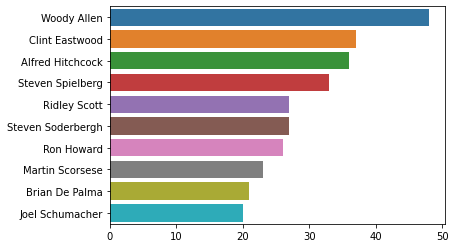

In [7]:
#ToDo: Create a dataframe for actors and number of movies they're in
#ToDo: Make a graph showing top 10 actors with the most movies
import seaborn as sns
import matplotlib.pylab as plt

certDf = data[['title', 'director']]
dirCount = certDf.director.value_counts().nlargest(10)

dir_counts = dirCount.values
dir_index = dirCount.index

#fig = px.pie(data, values = dirCount, names = dir_index, title = 'Pie Chart of Movie Certificates')
sns.barplot(data= data, x= dir_counts, y= dir_index)

#fig.show()